# scPopCorn analysis
This script runs [scPopCorn](https://github.com/ncbi/scPopCorn) on counts data from wild type CD 45.1 (WT) and
Traf6-deficient CD45.2 (KO) mice T cells and the [PBMC](https://satijalab.org/seurat/v3.2/integration.html) dataset.

In [75]:
import warnings; warnings.simplefilter('ignore')
from scpopcorn import MergeSingleCell
from scpopcorn import SingleCellData
import pandas as pd
import os

### Read in scRNA-seq raw counts data

In [78]:
File1 = "data/WT_TRAF6_10X/filtered_gene_bc_matrices/mm10/wt.tsv"
Test1 = SingleCellData()
Test1.ReadData_SeuratFormat(File1)

File2 = "data/KO_TRAF6_10X/filtered_gene_bc_matrices/mm10/ko.tsv"
Test2 = SingleCellData()
Test2.ReadData_SeuratFormat(File2)

File3 = "data/PBMC/matrix.txt"
Test3 = SingleCellData()
Test3.ReadData_SeuratFormat(File3)

2880
2341
3222


### Read in ground truth cell labels from the PBMC dataset

In [79]:
File3T = "data/PBMC/labels.txt"
Test3.ReadTurth(File3T, 0, 1)

None number is 0 


### Normalize scRNA-seq data, find Highly Variable Genes, and log transform

In [80]:
Test1.Normalized_per_Cell()
Test1.FindHVG()
Test1.Log1P()

Test2.Normalized_per_Cell()
Test2.FindHVG()
Test2.Log1P()

Test3.Normalized_per_Cell()
Test3.FindHVG()
Test3.Log1P()

### Combine datasets and set number of supercells for each dataset

In [81]:
NumSuperCell_Test1 = 50
NumSuperCell_Test2 = 50
NumSuperCell_Test3 = 50
MSingle = MergeSingleCell(Test1, Test2, Test3)
MSingle.MultiDefineSuperCell(NumSuperCell_Test1,NumSuperCell_Test2, NumSuperCell_Test3)

MSingle_PBMC = MergeSingleCell(Test3)
MSingle_PBMC.MultiDefineSuperCell(NumSuperCell_Test3)

### Compute within-dataset similarity and between-dataset similarity

In [82]:
Mat_Center = MSingle.ConstructWithinSimiarlityMat_SuperCellLevel()
Mat_Between = MSingle.ConstructBetweenSimiarlityMat_SuperCellLevel()

Mat_Center_PBMC = MSingle_PBMC.ConstructWithinSimiarlityMat_SuperCellLevel()
Mat_Between_PBMC = MSingle_PBMC.ConstructBetweenSimiarlityMat_SuperCellLevel()

13360
13277
12510
4008
3982
1501
13360
33694
10543
4008
10107
1628
13277
33694
10483
3982
10107
1630


## SDP solver

In [83]:
Estimate_NumCluster = 10 # initial guess of number of corresponding clusters, do not need to be accurate!!!
MSingle.SDP_NKcut(Estimate_NumCluster)

MSingle_PBMC.SDP_NKcut(Estimate_NumCluster)

/Users/ericasuh/miniconda3/envs/sc-env-2/lib/python3.8/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/Users/ericasuh/miniconda3/envs/sc-env-2/lib/python3.8/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


optimal value with SCS: 4.9115437298060165
optimal value with SCS: 10.00000604479076


/Users/ericasuh/miniconda3/envs/sc-env-2/lib/python3.8/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/Users/ericasuh/miniconda3/envs/sc-env-2/lib/python3.8/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


### Round and automatically estimate number of clusters

In [84]:
NumCluster_Min = 3 
NumCluster_Max = 20
# PopCorn will screen number of cluster from NumCluster_Min to NumCluster_Max and find the best number of clusters
CResult = MSingle.NKcut_Rounding(NumCluster_Min, NumCluster_Max)
CResult_PBMC = MSingle_PBMC.NKcut_Rounding(NumCluster_Min, NumCluster_Max)

/Users/ericasuh/miniconda3/envs/sc-env-2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Evaluate PBMC clusters using ground truth labels

In [85]:
MSingle_PBMC.Evaluation(CResult_PBMC)

['B', 'CD4+', 'Cytotoxic', 'Megakaryocyte', 'CD16+', 'CD14+', 'Dendritic', 'Natural']
['B', 'CD4+', 'Cytotoxic', 'Megakaryocyte', 'CD16+', 'CD14+', 'Dendritic', 'Natural']
###########Corresponding Clusterin 0##########
>Dataset 0
Number of Cells: 241
100.000000% percentage of cells are Megakaryocyte
unique cluster is ['Megakaryocyte']
###########Corresponding Clusterin 1##########
>Dataset 0
Number of Cells: 2654
1.092690% percentage of cells are Megakaryocyte
1.092690% percentage of cells are CD14+
1.394122% percentage of cells are Dendritic
3.654861% percentage of cells are CD16+
7.309721% percentage of cells are Natural
13.036925% percentage of cells are B
36.171816% percentage of cells are CD4+
36.247174% percentage of cells are Cytotoxic
unique cluster is ['Cytotoxic']
###########Corresponding Clusterin 2##########
>Dataset 0
Number of Cells: 327
0.305810% percentage of cells are Dendritic
0.305810% percentage of cells are CD16+
99.388379% percentage of cells are CD14+
unique clus

/Users/ericasuh/miniconda3/envs/sc-env-2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Calculate similarity between cells across datasets

In [86]:
MSingle.StatResult()

Similairty between cells across datasets of Cluster 0 is 0.316503
Similairty between cells across datasets of Cluster 1 is 2.426149
Cluster 2 is an unique cluster
Similairty between cells across datasets of Cluster 3 is 0.910644


### UMAP plots using the results generated by scPopCorn

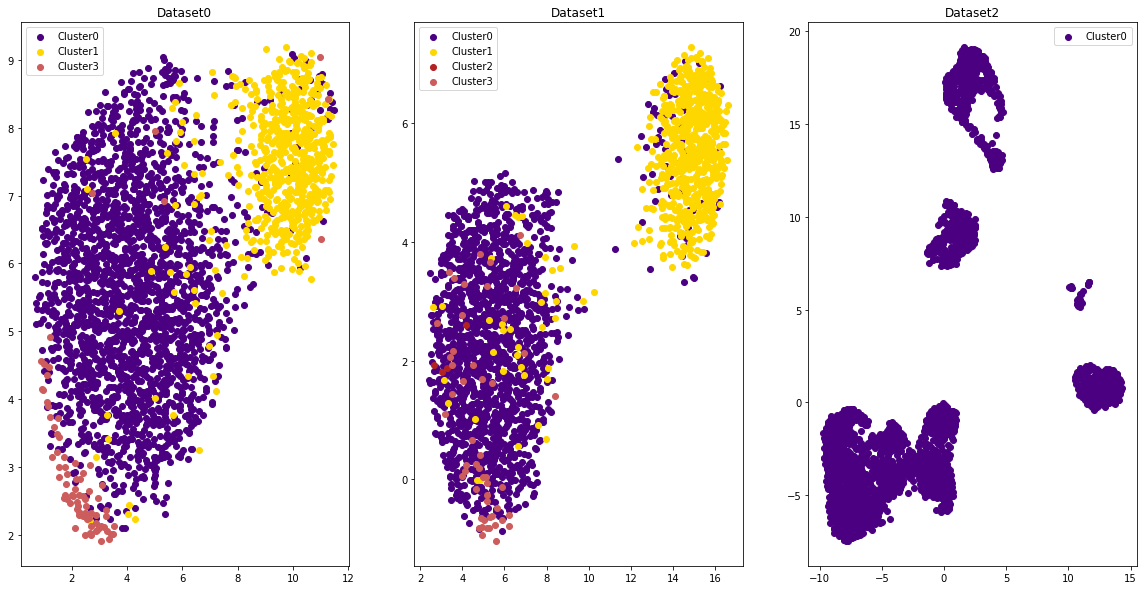

array([<AxesSubplot:title={'center':'Dataset0'}>,
       <AxesSubplot:title={'center':'Dataset1'}>,
       <AxesSubplot:title={'center':'Dataset2'}>], dtype=object)

In [87]:
MSingle.Umap_Result()

/Users/ericasuh/miniconda3/envs/sc-env-2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: 'AxesSubplot' object is not subscriptable

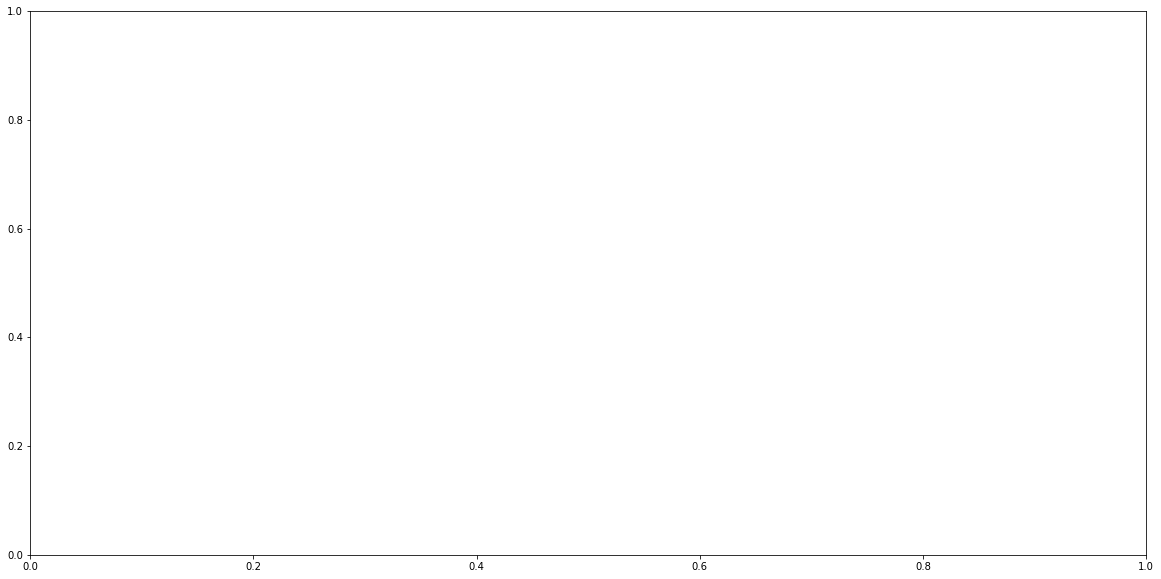

In [71]:
MSingle_PBMC.Umap_Result()

### Run scPopCorn for subclusters

In [88]:
ClusterID = 0
NumCluster = 8
MSingle.Deep_Partition(ClusterID, NumCluster) # deep partition for cluster 0 into 3 clusters
NumCluster_Min = 3
NumCluster_Max = 10
MSingle.SDP_Deep_Rounding(NumCluster_Min, NumCluster_Max) # find out best number of clusters for the deep partition
MSingle.Merge_Deep_Partition() # merge the new partitions to the original one
MSingle.Umap_Result() # see the new results

/Users/ericasuh/miniconda3/envs/sc-env-2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'Sym_LapMat' is not defined

## Output PopCorn results into a file

In [72]:
FileName = "scPopCorn_output.txt"
MSingle.OutputResult(FileName)

[1 1 1 1 1 1 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 3 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
2880
2341
3222


/Users/ericasuh/miniconda3/envs/sc-env-2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
